目前使用LOP為定義之實驗數據採用42筆，多變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre

In [2]:
datafile = u"/root/LR_ML/new2Data_8.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0)

In [4]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP
0,143,145,88,88,103,95,160.1
1,114,111,62,71,88,94,110.3
2,109,106,67,70,87,85,111.2
3,139,135,97,82,94,96,163.2
4,120,125,72,75,95,92,127.3


In [5]:
modTIP = TIP
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['LOP'], axis = 1))
print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'])
modTIP3['LOP'] = TIP['LOP']



Min max scaled data:
 [[0.97142857 1.         0.74285714 0.82142857 1.         0.95      ]
 [0.14285714 0.12820513 0.         0.21428571 0.46428571 0.9       ]
 [0.         0.         0.14285714 0.17857143 0.42857143 0.45      ]
 [0.85714286 0.74358974 1.         0.60714286 0.67857143 1.        ]
 [0.31428571 0.48717949 0.28571429 0.35714286 0.71428571 0.8       ]
 [0.37142857 0.38461538 0.         0.10714286 0.03571429 0.1       ]
 [0.62857143 0.82051282 0.82857143 1.         0.5        1.        ]
 [1.         0.94871795 0.91428571 0.92857143 0.67857143 0.65      ]
 [0.11428571 0.20512821 0.05714286 0.14285714 0.         0.        ]
 [0.08571429 0.1025641  0.14285714 0.         0.28571429 0.35      ]]


             SBPI        SBPL       DBPI       DBPL        BPMI       BPML  \
count   10.000000   10.000000  10.000000  10.000000   10.000000  10.000000   
mean   124.700000  124.800000  76.400000  77.200000   88.400000  88.400000   
std     13.499383   14.573949  14.323252  10.411532    8.720347   7.501111   
min    109.000000  106.000000  62.000000  65.000000   75.000000  76.000000   
25%    113.250000  111.750000  64.750000  69.250000   84.000000  83.500000   
50%    121.000000  123.000000  69.500000  73.000000   88.500000  90.500000   
75%    137.000000  137.250000  90.250000  86.500000   94.000000  94.750000   
max    144.000000  145.000000  97.000000  93.000000  103.000000  96.000000   

              LOP  
count   10.000000  
mean   128.150000  
std     20.863432  
min    106.400000  
25%    111.575000  
50%    122.900000  
75%    140.200000  
max    163.200000  
SBPI    0
SBPL    0
DBPI    0
DBPL    0
BPMI    0
BPML    0
LOP     0
dtype: int64
          SBPI      SBPL      DBPI

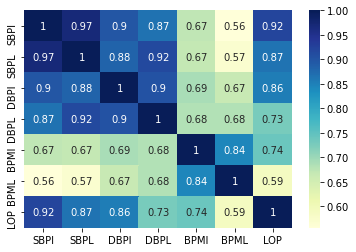

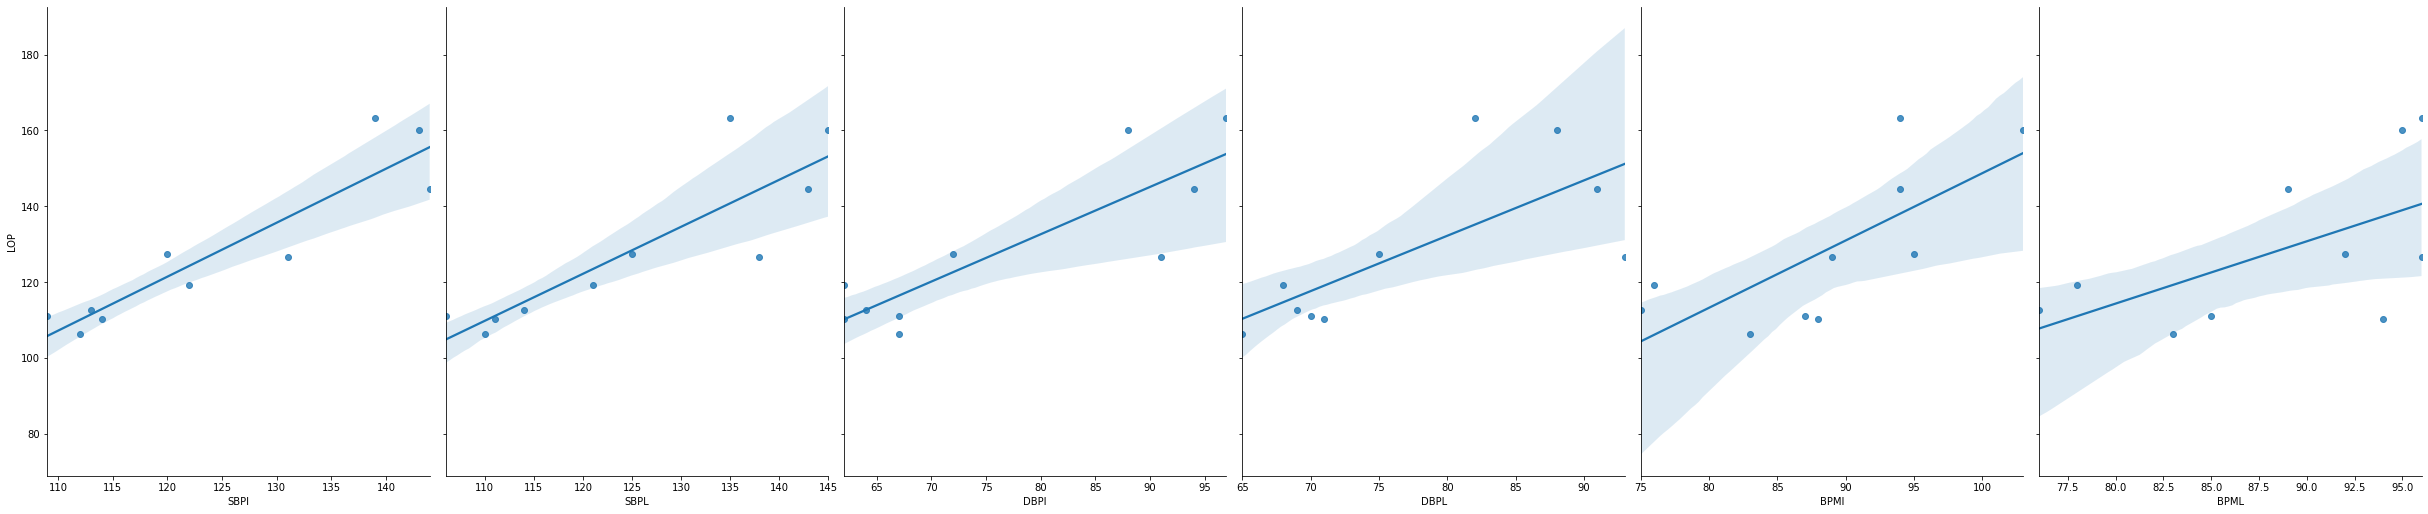

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot.png")
# plt.show()
# print(modTIP3.describe())
# print(modTIP3.corr())
# H = sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
# P = sns.pairplot(modTIP3, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# F = H.get_figure()
# F.savefig(u"/root/LR_ML/modData_Sorted4_correlation.png")
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot_normalization.png")
# plt.show()

自變量---源數據: (10, 3) ；  訓練集: (8, 3) ；  測試集: (2, 3)
因變量---源數據: (10,) ；  訓練集: (8,) ；  測試集: (2,)
擬合參數:截距 -8.066925259904053 ,迴歸係數： [0.57682829 0.82189738 0.02495883]
最佳擬合線: Y =  -8.07 + 0.58 * X1 +  0.82 * X2 +  0.02


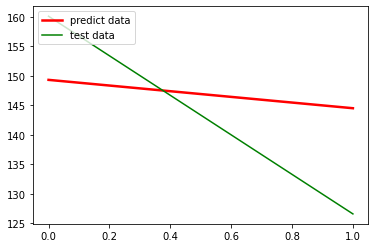

自變量---源數據: (10, 3) ；  訓練集: (8, 3) ；  測試集: (2, 3)
因變量---源數據: (10,) ；  訓練集: (8,) ；  測試集: (2,)
擬合參數:截距 103.64965608277313 ,迴歸係數： [36.54575828  6.95610693  8.96959953]
最佳擬合線: Y =  103.65 + 36.55 * X1 +  6.96 * X2 +  8.97


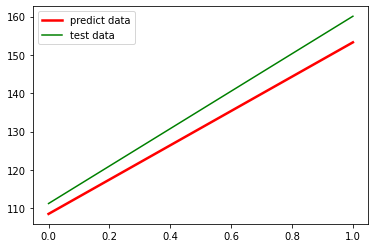

In [7]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.drop(['SBPL','DBPL','BPML'],axis=1).iloc[:,0:3],modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.drop(['SBPL','DBPL','BPML'],axis=1).iloc[:,0:3].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X1 + ",round(b[1],2),"* X2 + ",round(b[2],2))
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(modTIP3.drop(['SBPL','DBPL','BPML'],axis=1).iloc[:,0:3],modTIP.LOP,train_size=0.8)
print("自變量---源數據:",modTIP3.drop(['SBPL','DBPL','BPML'],axis=1).iloc[:,0:3].shape, "；  訓練集:",X_train1.shape, "；  測試集:",X_test1.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train1.shape, "；  測試集:",Y_test1.shape)
model1 = LinearRegression()
model1.fit(X_train1,Y_train1)
c  = model1.intercept_
d = model1.coef_
print("擬合參數:截距",c,",迴歸係數：",d)
print("最佳擬合線: Y = ",round(c,2),"+",round(d[0],2),"* X1 + ",round(d[1],2),"* X2 + ",round(d[2],2))
Y_pred1 = model1.predict(X_test1)
plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
plt.legend(loc=2)
# plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
plt.show()

In [8]:
# print("擬合參數:截距",c,",迴歸係數：",d)
# print("最佳擬合線: Y = ",round(c,2),"+",round(d[0],2),"* X1 + ",round(d[1],2),"* X2 + ",round(d[2],2), "* X3")
# Y_pred1 = model1.predict(X_test1)
# plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
# plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
# plt.legend(loc=2)
# # plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
# plt.show()

In [9]:
# from sklearn import linear_model
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.datasets import make_regression

# model2 = make_pipeline(PolynomialFeatures(2),linear_model.LinearRegression())
# model2.fit(X_train,Y_train)
# plt.scatter(X_train,Y_train)
# plt.plot(X_train,model.predict(X_train),color='red')